In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math



In [2]:
cars = pd.read_csv('Cars.csv')
cars.head()

,Unnamed: 0,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Première main,carburant,puiFiscale,boiteVitesse,price
0,0,90 000 - 94 999,2012,Peugeot,206+,5.0,WW au Maroc,Non,Essence,6 CV,Manuelle,60000.0
1,1,25 000 - 29 999,2011,Peugeot,Partner,NaN,NaN,NaN,Diesel,7 CV,Manuelle,62000.0
2,2,250 000 - 299 999,2010,Dacia,Sandero,5.0,NaN,Non,Diesel,6 CV,Manuelle,65000.0
3,3,200 000 - 249 999,2008,Volkswagen,Touareg,5.0,WW au Maroc,Non,Diesel,12 CV,Automatique,NaN
4,4,150 000 - 159 999,2008,Daihatsu,Sirion,NaN,NaN,NaN,Essence,--,--,48000.0


In [3]:
cars.tail()

,Unnamed: 0,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Première main,carburant,puiFiscale,boiteVitesse,price
4439,691,200 000 - 249 999,2006,Renault,Kangoo,5.0,WW au Maroc,Non,Diesel,7 CV,Manuelle,68000.0
4440,692,100 000 - 109 999,2017,Renault,Clio,5.0,NaN,Non,Diesel,6 CV,Manuelle,150000.0
4441,693,150 000 - 159 999,2013,Citroen,Berlingo,5.0,WW au Maroc,Oui,Diesel,7 CV,Manuelle,120000.0
4442,694,60 000 - 64 999,1999,Renault,Clio,NaN,NaN,NaN,Diesel,--,--,45000.0
4443,695,170 000 - 179 999,2005,Hyundai,Atos,NaN,NaN,NaN,Essence,5 CV,Manuelle,37000.0


In [4]:
cars.shape

(4444, 12)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4444 entries, 0 to 4443
Data columns (total 12 columns):
Unnamed: 0          4444 non-null int64
Kilométrage         4444 non-null object
Année-Modèle        4444 non-null object
Marque              4443 non-null object
Modèle              4443 non-null object
Nombre de portes    3601 non-null float64
Origine             3492 non-null object
Première main       3333 non-null object
carburant           4444 non-null object
puiFiscale          4444 non-null object
boiteVitesse        4444 non-null object
price               3362 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 416.8+ KB


In [6]:
cars.isnull().sum()

Unnamed: 0             0
Kilométrage            0
Année-Modèle           0
Marque                 1
Modèle                 1
Nombre de portes     843
Origine              952
Première main       1111
carburant              0
puiFiscale             0
boiteVitesse           0
price               1082
dtype: int64

In [7]:
total=cars.isnull().sum().sort_values(ascending=False)
perc1=cars.isnull().sum()/cars.isnull().count()*100
perc2=(round(perc1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,perc2], axis=1, keys=['Total','%'])
missing_data.head()

C:\Users\Zouheir\AppData\Local\conda\conda\envs\gpt2-env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Total,%
Année-Modèle,0,0.0
Kilométrage,0,0.0
Marque,1,0.0
Modèle,1,0.0
Nombre de portes,843,19.0


In [8]:
cars.describe()

,Unnamed: 0,Nombre de portes,price
count,4444.000000,3601.000000,3.362000e+03
mean,254.652115,4.886698,1.143104e+05
std,179.583132,0.462413,1.025645e+05
min,0.000000,3.000000,2.000000e+02
25%,113.000000,5.000000,5.500000e+04
50%,224.000000,5.000000,8.950000e+04
75%,341.000000,5.000000,1.350000e+05
max,699.000000,5.000000,1.550000e+06


In [9]:
print(cars.carburant.unique())
print(cars.Marque.unique())
print(cars['Nombre de portes'].unique())
print(cars.Origine.unique())
print(cars['Première main'].unique())
print(cars.price.unique())

['Essence' 'Diesel' 'Electrique' 'Hybride' '--']
['Peugeot' 'Dacia' 'Volkswagen' 'Daihatsu' 'Porsche' 'Mercedes-Benz'
 'Fiat' 'Toyota' 'Hyundai' 'Citroen' 'Renault' 'Nissan' 'Suzuki' 'Opel'
 'Chery' 'Ford' 'Seat' 'Audi' 'Kia' 'Land Rover' 'BMW' 'Mazda' 'Honda'
 'mini' 'Jeep' 'Isuzu' 'Mitsubishi' 'Ssangyong' 'Alfa Romeo' 'Chevrolet'
 'Autres' 'Volvo' 'Chrysler' 'Ferrari' 'Skoda' 'Daewoo' 'Geely' 'Maserati'
 'Infiniti' 'Jaguar' 'Smart' 'DS' 'Cadillac' 'Bentley' 'Dodge' 'Changhe'
 'lancia' 'Rover' 'Zotye' nan]
[ 5. nan  3.]
['WW au Maroc' nan 'Dédouanée' 'Importée neuve' 'Pas encore dédouanée']
['Non' nan 'Oui']
[6.000e+04 6.200e+04 6.500e+04       nan 4.800e+04 9.800e+04 4.500e+05
 4.000e+04 6.700e+04 1.400e+05 1.170e+05 5.800e+04 2.070e+05 8.700e+04
 2.600e+04 7.000e+04 3.800e+04 3.400e+04 5.700e+04 7.300e+04 1.450e+05
 1.250e+05 1.080e+05 5.500e+04 8.300e+04 9.300e+04 2.800e+04 8.200e+04
 7.800e+04 3.700e+04 9.000e+04 1.570e+05 6.800e+04 5.300e+04 1.150e+05
 7.900e+04 5.000e+04 5.200e+

In [10]:
cars[cars['price']<8000]

,Unnamed: 0,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Première main,carburant,puiFiscale,boiteVitesse,price
3777,29,0 - 4 999,2006,Audi,A3,NaN,NaN,NaN,Diesel,8 CV,--,1500.0
3786,38,0 - 4 999,2006,Audi,A3,NaN,NaN,NaN,Diesel,8 CV,--,1500.0
3877,129,70 000 - 74 999,1990,Ford,ESCORT,NaN,NaN,NaN,Essence,6 CV,--,200.0
3903,155,190 000 - 199 999,2005,Peugeot,Partner,5.0,WW au Maroc,Non,Diesel,7 CV,Manuelle,5000.0


In [11]:
df=cars

In [12]:
df[df['price']<8000]

,Unnamed: 0,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Première main,carburant,puiFiscale,boiteVitesse,price
3777,29,0 - 4 999,2006,Audi,A3,NaN,NaN,NaN,Diesel,8 CV,--,1500.0
3786,38,0 - 4 999,2006,Audi,A3,NaN,NaN,NaN,Diesel,8 CV,--,1500.0
3877,129,70 000 - 74 999,1990,Ford,ESCORT,NaN,NaN,NaN,Essence,6 CV,--,200.0
3903,155,190 000 - 199 999,2005,Peugeot,Partner,5.0,WW au Maroc,Non,Diesel,7 CV,Manuelle,5000.0


In [13]:
df.replace(to_replace=1500.0,value=85000,inplace=True)

In [14]:
df.replace(to_replace=200.0,value=29000,inplace=True)
df.replace(to_replace=5000.0,value=40000,inplace=True)

In [15]:
df[df['price']<=10000]

,Unnamed: 0,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Première main,carburant,puiFiscale,boiteVitesse,price
1753,5,130 000 - 139 999,1984,Renault,B80,5.0,WW au Maroc,Non,Essence,6 CV,Manuelle,10000.0
4146,398,50 000 - 54 999,1980 ou plus ancien,Volkswagen,Golf,NaN,NaN,NaN,Diesel,--,--,10000.0


In [16]:
df.max()

Unnamed: 0                    29000
Kilométrage         Plus de 500 000
Année-Modèle                   2021
Nombre de portes                  5
carburant                   Hybride
puiFiscale                     9 CV
boiteVitesse               Manuelle
price                      1.55e+06
dtype: object

In [17]:
df.replace(["nan","--"], np.nan, inplace=True)

In [18]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [19]:
df[df['carburant'].isnull()]

,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Première main,carburant,puiFiscale,boiteVitesse,price
4347,100 000 - 109 999,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88000.0


In [20]:
df.drop( df[df['carburant'].isnull()].index, inplace=True)

In [21]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4443 entries, 0 to 4443
Data columns (total 11 columns):
Kilométrage         4443 non-null object
Année-Modèle        4443 non-null object
Marque              4443 non-null object
Modèle              4443 non-null object
Nombre de portes    3601 non-null float64
Origine             3492 non-null object
Première main       3333 non-null object
carburant           4443 non-null object
puiFiscale          4116 non-null object
boiteVitesse        3823 non-null object
price               3361 non-null float64
dtypes: float64(2), object(9)
memory usage: 416.5+ KB


In [22]:
df['Année-Modèle'].unique()

array(['2012', '2011', '2010', '2008', '2014', '2004', '2015', '1991',
       '2018', '2006', '2021', '2017', '1984', '2005', '2013', '2001',
       '2007', '2009', '1990', '2000', '1998', '2016', '2019', '2020',
       '1999', '1989', '2003', '2002', '1996', '1997', '1988', '1994',
       '1995', '1985', '1992', '1993', '1987', '1982',
       '1980 ou plus ancien', '1986', '1983'], dtype=object)

In [23]:
df.head(1)

,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Première main,carburant,puiFiscale,boiteVitesse,price
0,90 000 - 94 999,2012,Peugeot,206+,5.0,WW au Maroc,Non,Essence,6 CV,Manuelle,60000.0


In [24]:
ModY=[]
for i in df['Année-Modèle'] :
    ModY.append(int(i.replace(" ou plus ancien","")))
df['Année-Modèle']=ModY

In [25]:
CV=[]
for i in df['puiFiscale'] :
    if type(i)==str:
        CV.append(int(i.replace(" ","").replace("CV","")))
    else :
        CV.append(np.nan)
df['puiFiscale']=CV
df.head()


,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Première main,carburant,puiFiscale,boiteVitesse,price
0,90 000 - 94 999,2012,Peugeot,206+,5.0,WW au Maroc,Non,Essence,6.0,Manuelle,60000.0
1,25 000 - 29 999,2011,Peugeot,Partner,NaN,NaN,NaN,Diesel,7.0,Manuelle,62000.0
2,250 000 - 299 999,2010,Dacia,Sandero,5.0,NaN,Non,Diesel,6.0,Manuelle,65000.0
3,200 000 - 249 999,2008,Volkswagen,Touareg,5.0,WW au Maroc,Non,Diesel,12.0,Automatique,NaN
4,150 000 - 159 999,2008,Daihatsu,Sirion,NaN,NaN,NaN,Essence,NaN,NaN,48000.0


In [26]:

df.head()

,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Première main,carburant,puiFiscale,boiteVitesse,price
0,90 000 - 94 999,2012,Peugeot,206+,5.0,WW au Maroc,Non,Essence,6.0,Manuelle,60000.0
1,25 000 - 29 999,2011,Peugeot,Partner,NaN,NaN,NaN,Diesel,7.0,Manuelle,62000.0
2,250 000 - 299 999,2010,Dacia,Sandero,5.0,NaN,Non,Diesel,6.0,Manuelle,65000.0
3,200 000 - 249 999,2008,Volkswagen,Touareg,5.0,WW au Maroc,Non,Diesel,12.0,Automatique,NaN
4,150 000 - 159 999,2008,Daihatsu,Sirion,NaN,NaN,NaN,Essence,NaN,NaN,48000.0


In [27]:
df['Kilométrage'].unique()
kil1=[]
kil2=[]
for i in df['Kilométrage'] :
    index=i.find('-')
    kil1.append(int(i[0:index].replace(" ","").replace("Plusde","")))
    kil2.append(int(i[index+1:].replace(" ","").replace("Plusde","")))
    

df['kilo_min']=kil1
df['kilo_max']=kil2



In [28]:
df.drop( columns="Kilométrage", inplace=True)
df.head(1)

,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Première main,carburant,puiFiscale,boiteVitesse,price,kilo_min,kilo_max
0,2012,Peugeot,206+,5.0,WW au Maroc,Non,Essence,6.0,Manuelle,60000.0,90000,94999


In [29]:
df.rename(columns={'Nombre de portes':'Nombre_portes','Première main':'Premiere_main','Année-Modèle':'Année_Modèle'},inplace=True)

In [30]:
print(cars.carburant.unique())
print(cars.Marque.unique())
print(cars.Nombre_portes.unique())
#print(cars['Nombre de portes'].unique())
print(cars.Origine.unique())
#print(cars['Première main'].unique())
print(cars.Premiere_main.unique())
print(cars.price.unique())

['Essence' 'Diesel' 'Electrique' 'Hybride']
['Peugeot' 'Dacia' 'Volkswagen' 'Daihatsu' 'Porsche' 'Mercedes-Benz'
 'Fiat' 'Toyota' 'Hyundai' 'Citroen' 'Renault' 'Nissan' 'Suzuki' 'Opel'
 'Chery' 'Ford' 'Seat' 'Audi' 'Kia' 'Land Rover' 'BMW' 'Mazda' 'Honda'
 'mini' 'Jeep' 'Isuzu' 'Mitsubishi' 'Ssangyong' 'Alfa Romeo' 'Chevrolet'
 'Autres' 'Volvo' 'Chrysler' 'Ferrari' 'Skoda' 'Daewoo' 'Geely' 'Maserati'
 'Infiniti' 'Jaguar' 'Smart' 'DS' 'Cadillac' 'Bentley' 'Dodge' 'Changhe'
 'lancia' 'Rover' 'Zotye']
[ 5. nan  3.]
['WW au Maroc' nan 'Dédouanée' 'Importée neuve' 'Pas encore dédouanée']
['Non' nan 'Oui']
[  60000.   62000.   65000.      nan   48000.   98000.  450000.   40000.
   67000.  140000.  117000.   58000.  207000.   87000.   26000.   70000.
   38000.   34000.   57000.   73000.  145000.  125000.  108000.   55000.
   83000.   93000.   28000.   82000.   78000.   37000.   90000.  157000.
   68000.   53000.  115000.   79000.   50000.   52000.  120000.  135000.
   27000.   46000.  124000.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4443 entries, 0 to 4443
Data columns (total 12 columns):
Année_Modèle     4443 non-null int64
Marque           4443 non-null object
Modèle           4443 non-null object
Nombre_portes    3601 non-null float64
Origine          3492 non-null object
Premiere_main    3333 non-null object
carburant        4443 non-null object
puiFiscale       4116 non-null float64
boiteVitesse     3823 non-null object
price            3361 non-null float64
kilo_min         4443 non-null int64
kilo_max         4443 non-null int64
dtypes: float64(3), int64(3), object(6)
memory usage: 451.2+ KB


In [32]:
cars.isnull().sum()

Année_Modèle        0
Marque              0
Modèle              0
Nombre_portes     842
Origine           951
Premiere_main    1110
carburant           0
puiFiscale        327
boiteVitesse      620
price            1082
kilo_min            0
kilo_max            0
dtype: int64

In [33]:
df.shape

(4443, 12)

In [34]:

df.drop( df[df['price'].isnull()].index, inplace=True)

In [35]:
df.isnull().sum()

Année_Modèle       0
Marque             0
Modèle             0
Nombre_portes    581
Origine          675
Premiere_main    775
carburant          0
puiFiscale       182
boiteVitesse     415
price              0
kilo_min           0
kilo_max           0
dtype: int64

In [36]:
d=df[df['Nombre_portes'].isnull()]
d[d['Marque']=='Autres']

,Année_Modèle,Marque,Modèle,Nombre_portes,Origine,Premiere_main,carburant,puiFiscale,boiteVitesse,price,kilo_min,kilo_max
3914,1996,Autres,Autres,NaN,NaN,NaN,Diesel,NaN,NaN,58000.0,400000,449999
3925,1996,Autres,Autres,NaN,NaN,NaN,Diesel,NaN,NaN,58000.0,400000,449999


In [37]:
df.drop( df[df['Marque']=='Autres'].index, inplace=True)

In [38]:
modes=df.mode()
mode_portes=modes["Nombre_portes"]

mode_portes=mode_portes.values[0]
mode_portes

5.0

In [39]:

import statistics 
def replace_value(feature,mode):
    for i,row in df.iterrows():
         if math.isnan(row[feature]):
            modele = row["Modèle"]
            
            t=df[df["Modèle"]==row['Modèle']]
            
            nOfDoors=[]
            for j in t[feature] :
                if not math.isnan(j):
                    nOfDoors.append(j)
            
            if len(nOfDoors)!=0 :
                df[feature].loc[i] = nOfDoors[0]
            else :
                df[feature].loc[i]= mode
        
   
                
replace_value("Nombre_portes",mode_portes)

C:\Users\Zouheir\AppData\Local\conda\conda\envs\gpt2-env\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [40]:
df.isnull().sum()

Année_Modèle       0
Marque             0
Modèle             0
Nombre_portes      0
Origine          673
Premiere_main    773
carburant          0
puiFiscale       180
boiteVitesse     413
price              0
kilo_min           0
kilo_max           0
dtype: int64

In [41]:

math.isnan(df["Nombre_portes"].unique()[1])

False

In [42]:
df.isnull().sum()

Année_Modèle       0
Marque             0
Modèle             0
Nombre_portes      0
Origine          673
Premiere_main    773
carburant          0
puiFiscale       180
boiteVitesse     413
price              0
kilo_min           0
kilo_max           0
dtype: int64

In [43]:
total=df.isnull().sum().sort_values(ascending=False)
perc1=df.isnull().sum()/df.isnull().count()*100
perc2=(round(perc1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,perc2], axis=1, keys=['Total','%'])
missing_data.head()

,Total,%
Premiere_main,773,23.0
Origine,673,20.1
boiteVitesse,413,12.3
puiFiscale,180,5.4
kilo_max,0,0.0


In [44]:
df.isnull().sum()

Année_Modèle       0
Marque             0
Modèle             0
Nombre_portes      0
Origine          673
Premiere_main    773
carburant          0
puiFiscale       180
boiteVitesse     413
price              0
kilo_min           0
kilo_max           0
dtype: int64

In [45]:
df.drop( columns="Premiere_main", inplace=True)
df.isnull().sum()

Année_Modèle       0
Marque             0
Modèle             0
Nombre_portes      0
Origine          673
carburant          0
puiFiscale       180
boiteVitesse     413
price              0
kilo_min           0
kilo_max           0
dtype: int64

In [46]:
mode_pui=modes["puiFiscale"][0]
replace_value("puiFiscale",mode_pui)

In [47]:
df.isnull().sum()

Année_Modèle       0
Marque             0
Modèle             0
Nombre_portes      0
Origine          673
carburant          0
puiFiscale         0
boiteVitesse     413
price              0
kilo_min           0
kilo_max           0
dtype: int64

In [48]:
df["boiteVitesse"].unique()
dic={"boiteVitesse":{'Manuelle':1 , 'Automatique':2}}
df.replace(dic,inplace=True)
df.head()

,Année_Modèle,Marque,Modèle,Nombre_portes,Origine,carburant,puiFiscale,boiteVitesse,price,kilo_min,kilo_max
0,2012,Peugeot,206+,5.0,WW au Maroc,Essence,6.0,1.0,60000.0,90000,94999
1,2011,Peugeot,Partner,5.0,NaN,Diesel,7.0,1.0,62000.0,25000,29999
2,2010,Dacia,Sandero,5.0,NaN,Diesel,6.0,1.0,65000.0,250000,299999
4,2008,Daihatsu,Sirion,5.0,NaN,Essence,6.0,NaN,48000.0,150000,159999
5,2014,Dacia,Duster,5.0,WW au Maroc,Diesel,6.0,1.0,98000.0,170000,179999


In [49]:
mode_vit = df.boiteVitesse.mode()[0]
replace_value("boiteVitesse",mode_vit)

In [50]:
df.isnull().sum()

Année_Modèle       0
Marque             0
Modèle             0
Nombre_portes      0
Origine          673
carburant          0
puiFiscale         0
boiteVitesse       0
price              0
kilo_min           0
kilo_max           0
dtype: int64

In [51]:

dic={"Origine":{'WW au Maroc':1 , 'Dédouanée':2,'Importée neuve':3 ,'Pas encore dédouanée':4 }}
df.replace(dic,inplace=True)
df.head()
df.Origine.unique()

array([ 1., nan,  2.,  3.,  4.])

In [52]:
mode_Org = df.Origine.mode()[0]
replace_value("Origine",mode_Org)

In [53]:
df.isnull().sum()

Année_Modèle     0
Marque           0
Modèle           0
Nombre_portes    0
Origine          0
carburant        0
puiFiscale       0
boiteVitesse     0
price            0
kilo_min         0
kilo_max         0
dtype: int64

In [54]:
df.shape

(3356, 11)

In [55]:
print(df.carburant.unique())
print(df.Marque.unique())
print(df.Année_Modèle.unique())
print(df.Nombre_portes.unique())
print(df.Origine.unique())
print(df.Modèle.unique())
print(df.price.unique())
print(df.puiFiscale.unique())
print(df.boiteVitesse.unique())
print(df.kilo_min.unique())
print(df.kilo_max.unique())

['Essence' 'Diesel' 'Hybride']
['Peugeot' 'Dacia' 'Daihatsu' 'Porsche' 'Mercedes-Benz' 'Fiat' 'Toyota'
 'Citroen' 'Renault' 'Nissan' 'Hyundai' 'Volkswagen' 'Suzuki' 'Opel'
 'Chery' 'Ford' 'Seat' 'Kia' 'BMW' 'Mazda' 'Honda' 'Audi' 'mini' 'Isuzu'
 'Mitsubishi' 'Ssangyong' 'Alfa Romeo' 'Chevrolet' 'Land Rover' 'Volvo'
 'Skoda' 'Daewoo' 'Geely' 'Maserati' 'Jeep' 'Infiniti' 'DS' 'Cadillac'
 'Smart' 'Jaguar' 'Changhe' 'lancia' 'Rover' 'Chrysler']
[2012 2011 2010 2008 2014 2015 1991 2018 2017 2004 1984 2005 2013 2001
 2007 2009 1990 2000 2006 2020 1999 1989 1998 2016 2002 2019 1997 1988
 1994 1995 2003 1985 1992 1987 1993 1996 1982 2021 1980 1986 1983]
[5. 3.]
[1. 2. 3. 4.]
['206+' 'Partner' 'Sandero' 'Sirion' 'Duster' 'Macan' '250' 'Punto'
 'Corolla' 'C4' 'Clio' 'Qashqai' 'Berlingo' 'R11' '206' 'Symbol' 'Palio'
 'Elantra' 'Bora' 'i 40' 'Dokker' 'Vitara' 'Insignia' 'Uno' '405' '220'
 'A113' 'Fiesta' 'Leon' 'Doblo' 'Logan' 'Passat' '207' 'Kangoo' '208'
 'Ceed' 'REGATA' 'Touran' '270' 'Serie 3 

In [56]:
df.describe()

,Année_Modèle,Nombre_portes,Origine,puiFiscale,boiteVitesse,price,kilo_min,kilo_max
count,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3.356000e+03,3356.000000,3356.000000
mean,2009.621573,4.882002,1.272944,7.565852,1.216329,1.144596e+05,127796.483909,147396.208284
std,7.899695,0.471315,0.545400,2.677969,0.411802,1.025790e+05,81558.003275,100131.971628
min,1980.000000,3.000000,1.000000,4.000000,1.000000,1.000000e+04,0.000000,4999.000000
25%,2006.000000,5.000000,1.000000,6.000000,1.000000,5.500000e+04,70000.000000,74999.000000
50%,2011.000000,5.000000,1.000000,7.000000,1.000000,9.000000e+04,120000.000000,129999.000000
75%,2016.000000,5.000000,1.000000,8.000000,1.000000,1.350000e+05,190000.000000,199999.000000
max,2021.000000,5.000000,4.000000,33.000000,2.000000,1.550000e+06,450000.000000,500000.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 4443
Data columns (total 11 columns):
Année_Modèle     3356 non-null int64
Marque           3356 non-null object
Modèle           3356 non-null object
Nombre_portes    3356 non-null float64
Origine          3356 non-null float64
carburant        3356 non-null object
puiFiscale       3356 non-null float64
boiteVitesse     3356 non-null float64
price            3356 non-null float64
kilo_min         3356 non-null int64
kilo_max         3356 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 474.6+ KB


In [58]:
df['Nombre_portes']=df.Nombre_portes.astype('int64')
df['Origine']=df.Origine.astype('int64')
df['boiteVitesse']=df.boiteVitesse.astype('int64')
df['puiFiscale']=df.puiFiscale.astype('int64')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 4443
Data columns (total 11 columns):
Année_Modèle     3356 non-null int64
Marque           3356 non-null object
Modèle           3356 non-null object
Nombre_portes    3356 non-null int64
Origine          3356 non-null int64
carburant        3356 non-null object
puiFiscale       3356 non-null int64
boiteVitesse     3356 non-null int64
price            3356 non-null float64
kilo_min         3356 non-null int64
kilo_max         3356 non-null int64
dtypes: float64(1), int64(7), object(3)
memory usage: 474.6+ KB


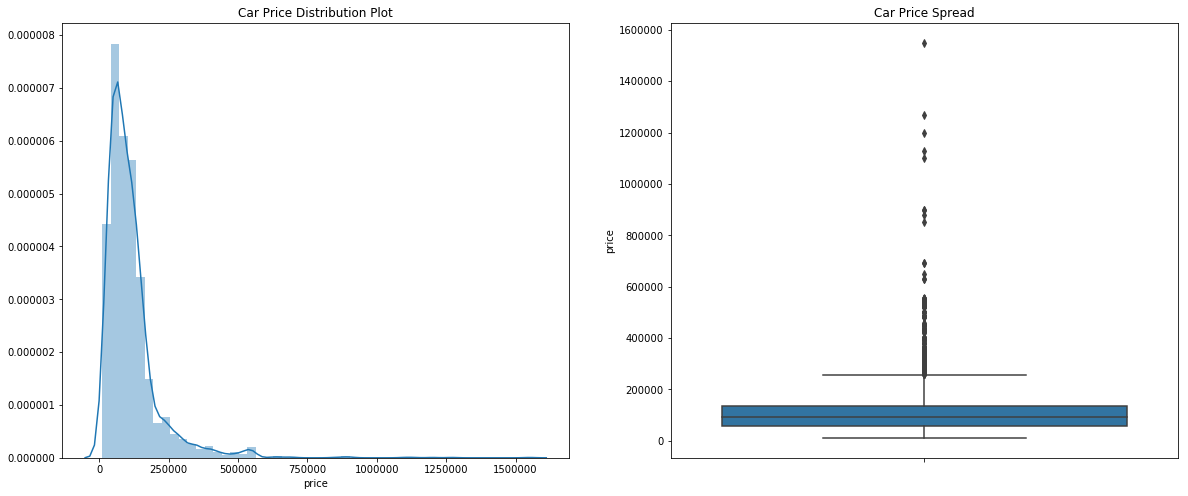

"f, ax = plt.subplots(figsize=(15,8))\nsns.distplot(df['price'])\nplt.xlim([0,160])"

In [60]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()


'''f, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['price'])
plt.xlim([0,160])'''

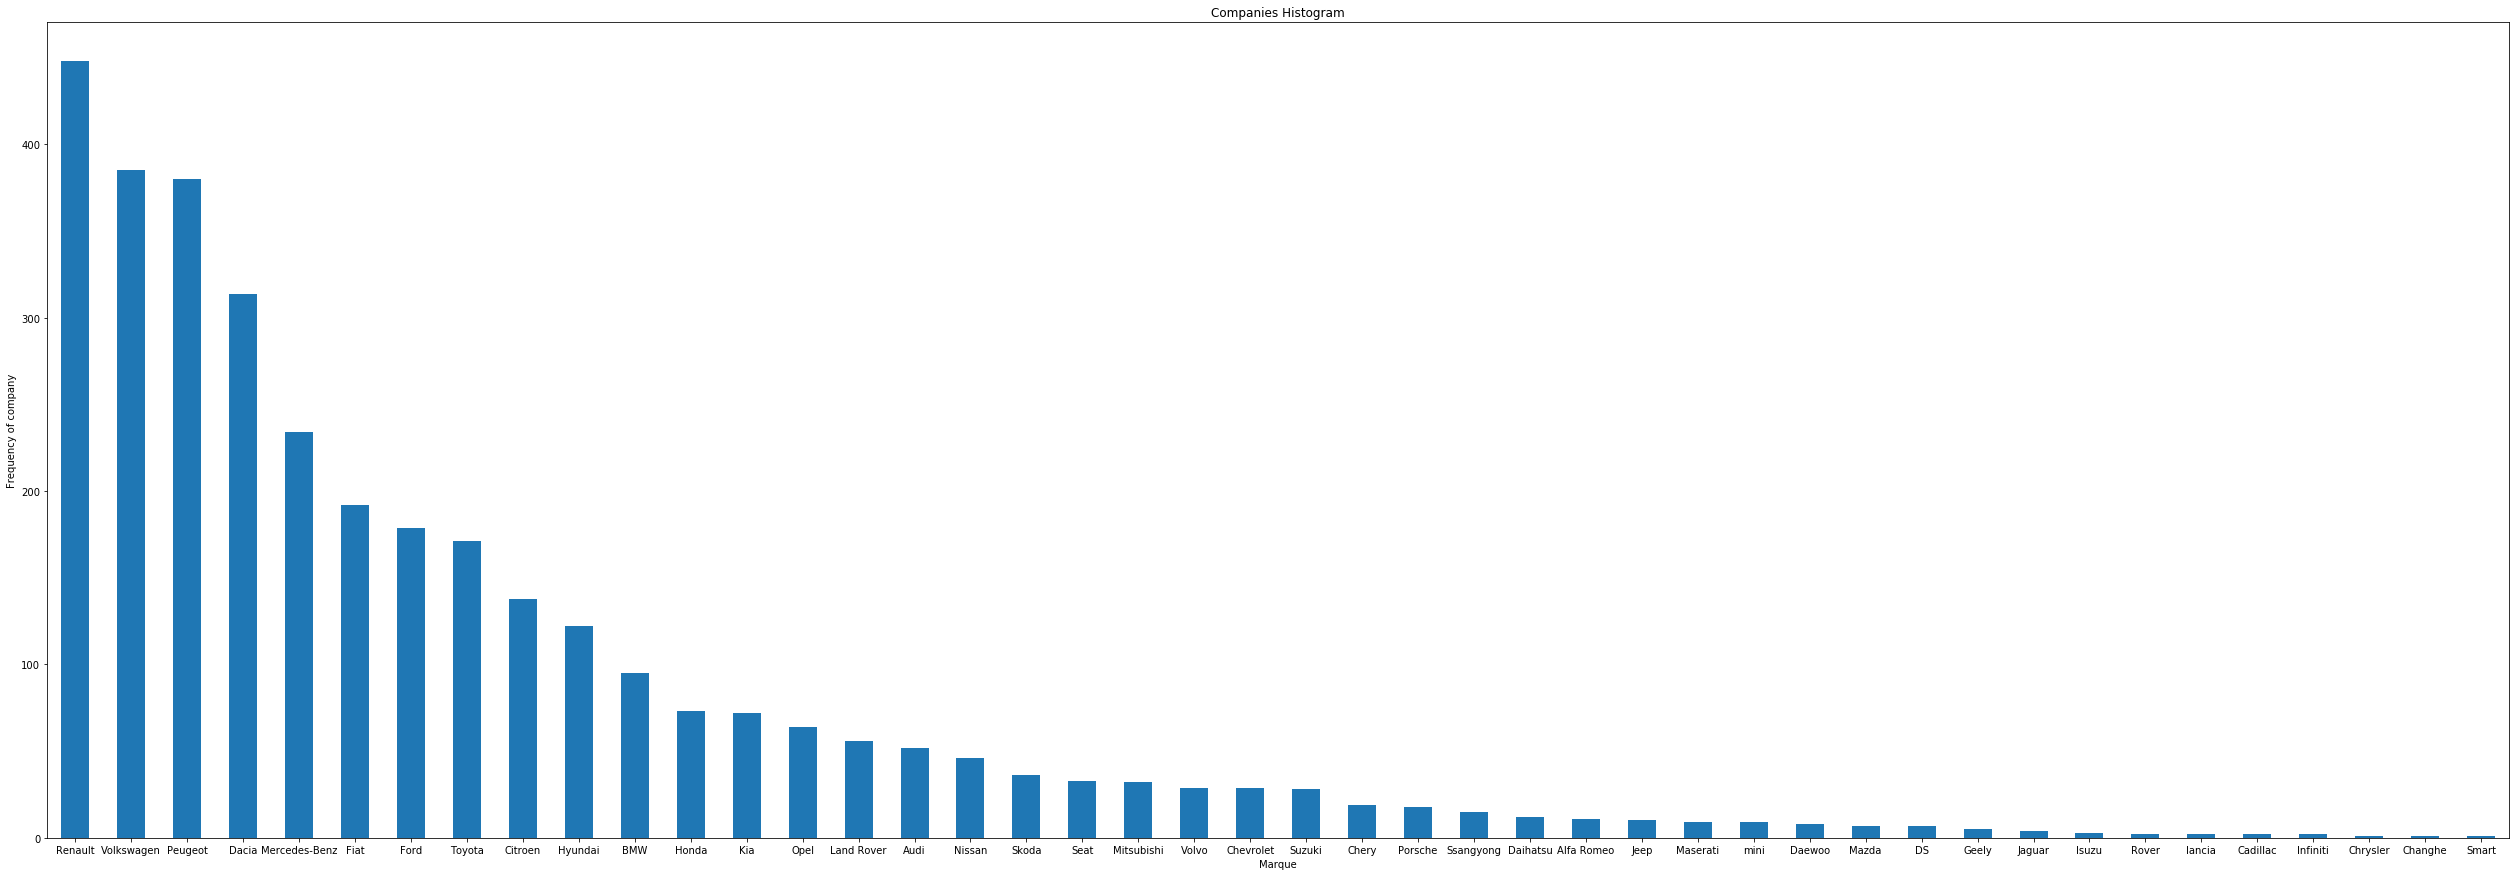

In [61]:
plt.figure(figsize=(150, 15))

plt.subplot(1,3,1)
plt1 = df.Marque.value_counts().plot.bar(rot=0)
plt.title('Companies Histogram')
plt1.set(xlabel = 'Marque', ylabel='Frequency of company')


plt.show()

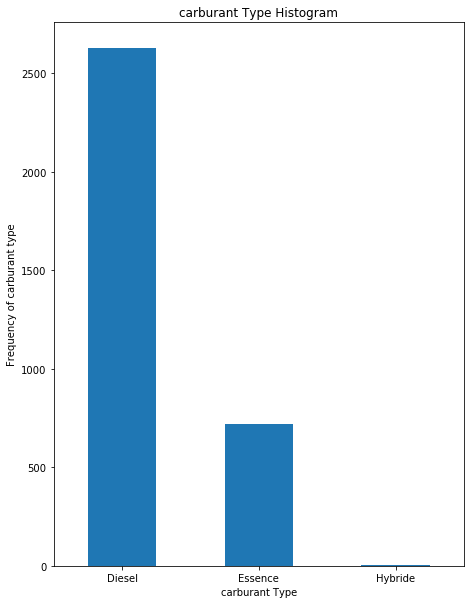

In [62]:
plt.figure(figsize=(25, 10))

plt.subplot(1,3,2)
plt1 = df.carburant.value_counts().plot.bar(rot=0)
plt.title('carburant Type Histogram')
plt1.set(xlabel = 'carburant Type', ylabel='Frequency of carburant type')


plt.show()

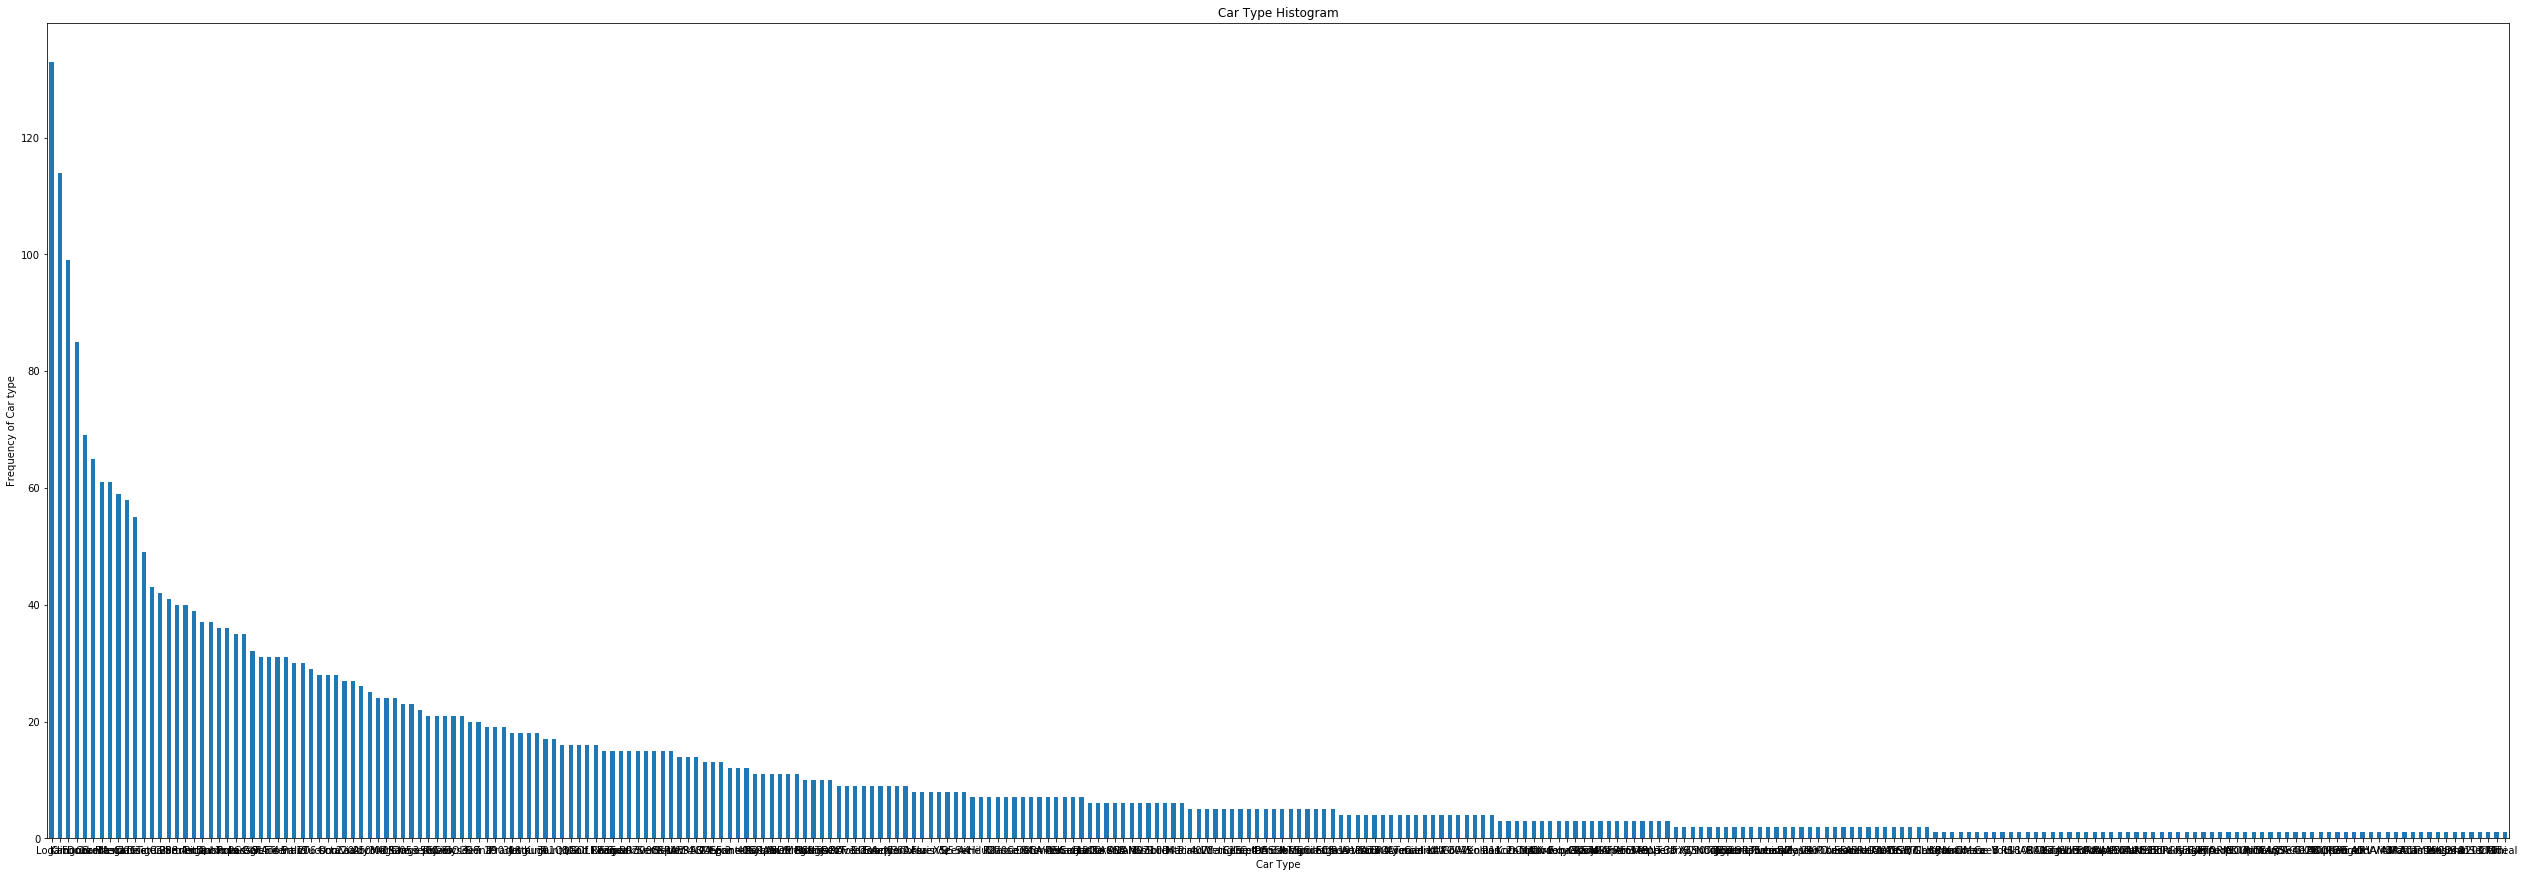

In [63]:
plt.figure(figsize=(150, 15))

plt.subplot(1,3,3)
plt1 = df.Modèle.value_counts().plot.bar(rot=0)
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

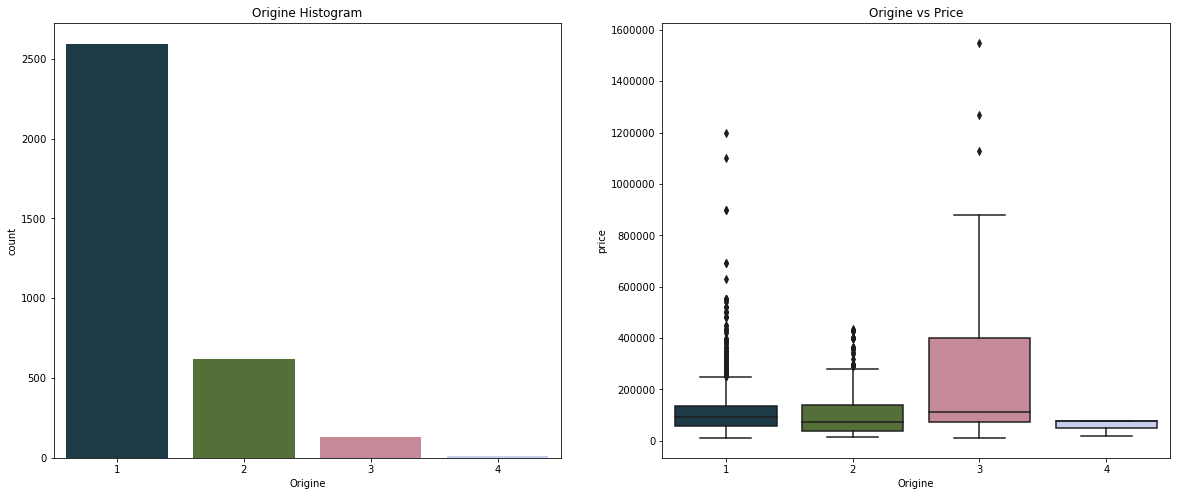

In [64]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Origine Histogram')
sns.countplot(df.Origine, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Origine vs Price')
sns.boxplot(x=df.Origine, y=df.price, palette=("cubehelix"))

plt.show()

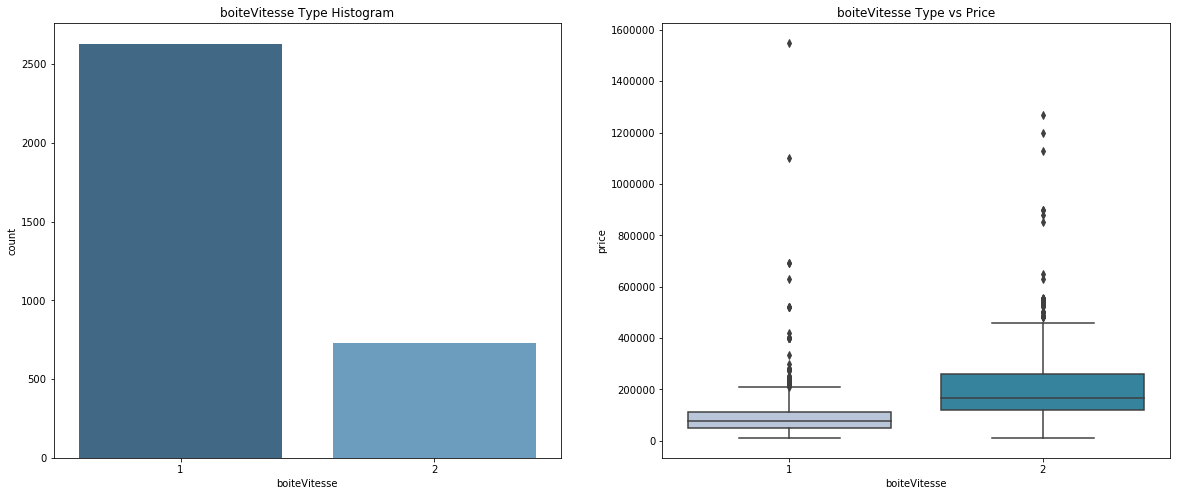

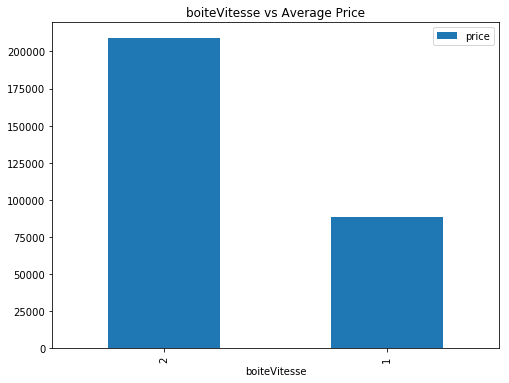

In [65]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('boiteVitesse Type Histogram')
sns.countplot(df.boiteVitesse, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('boiteVitesse Type vs Price')
sns.boxplot(x=df.boiteVitesse, y=cars.price, palette=("PuBuGn"))

plt.show()

df1 = pd.DataFrame(df.groupby(['boiteVitesse'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('boiteVitesse vs Average Price')
plt.show()

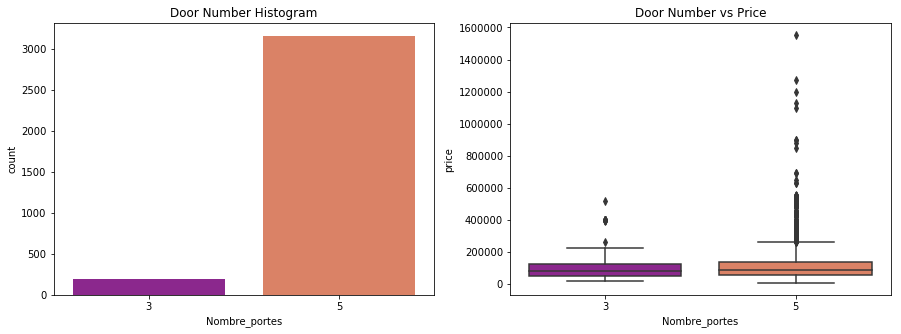

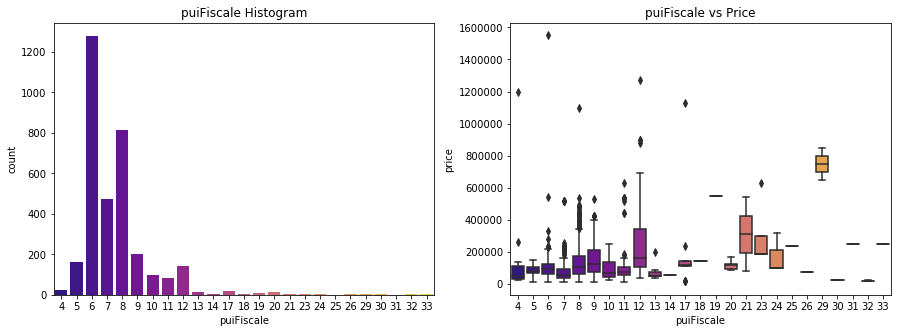

In [66]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(df.Nombre_portes, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df.Nombre_portes, y=df.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('puiFiscale Histogram')
sns.countplot(df.puiFiscale, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('puiFiscale vs Price')
sns.boxplot(x=df.puiFiscale, y=df.price, palette=("plasma"))

plt.show()

<Figure size 25200x7200 with 0 Axes>

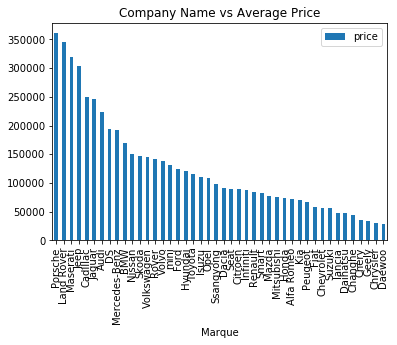

In [67]:
plt.figure(figsize=(350, 100))

df1 = pd.DataFrame(df.groupby(['Marque'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()



<Figure size 7200x432 with 0 Axes>

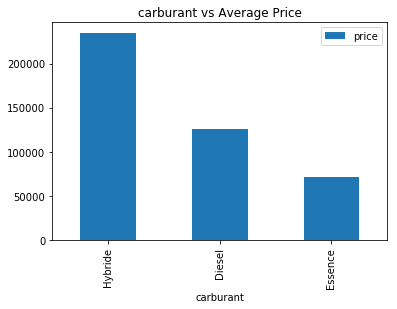

In [68]:
plt.figure(figsize=(100, 6))
df1 = pd.DataFrame(df.groupby(['carburant'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('carburant vs Average Price')
plt.show()



<Figure size 7200x432 with 0 Axes>

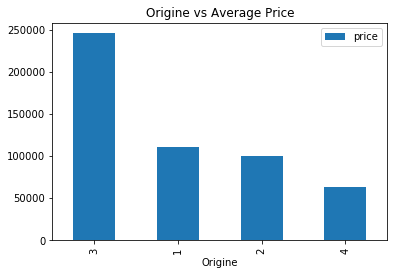

In [69]:
plt.figure(figsize=(100, 6))
df1 = pd.DataFrame(df.groupby(['Origine'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Origine vs Average Price')
plt.show()

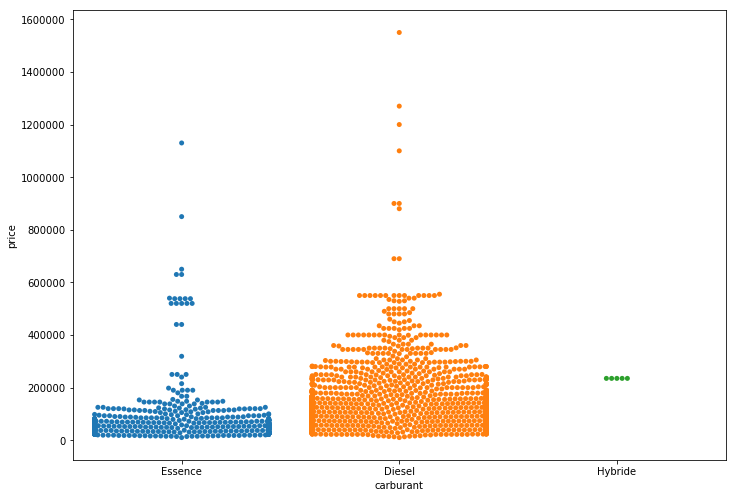

In [70]:
var = 'carburant'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='price', data = df)

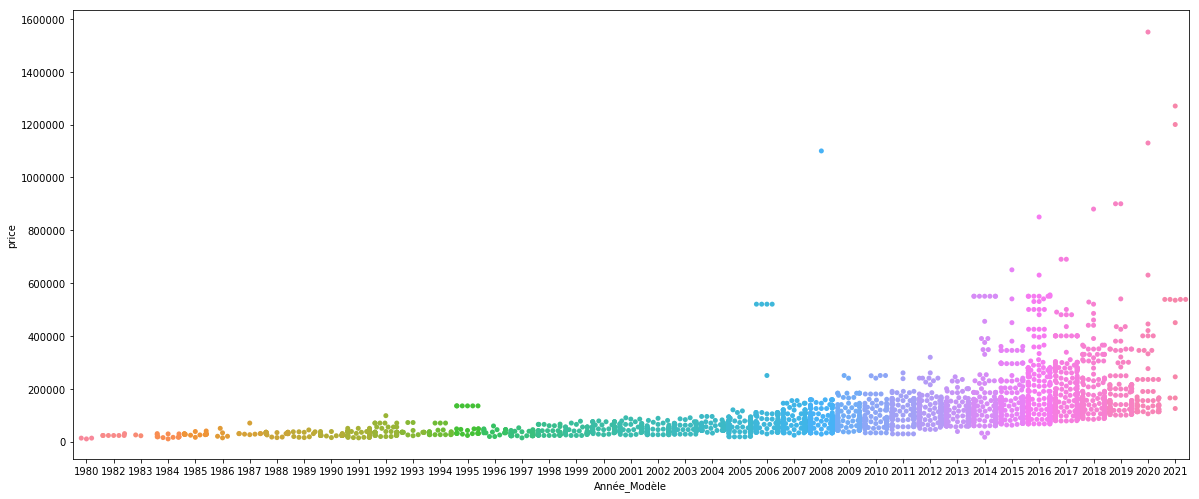

In [71]:
var = 'Année_Modèle'
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
sns.swarmplot(x = var, y ='price', data = df)

<Figure size 1440x720 with 0 Axes>

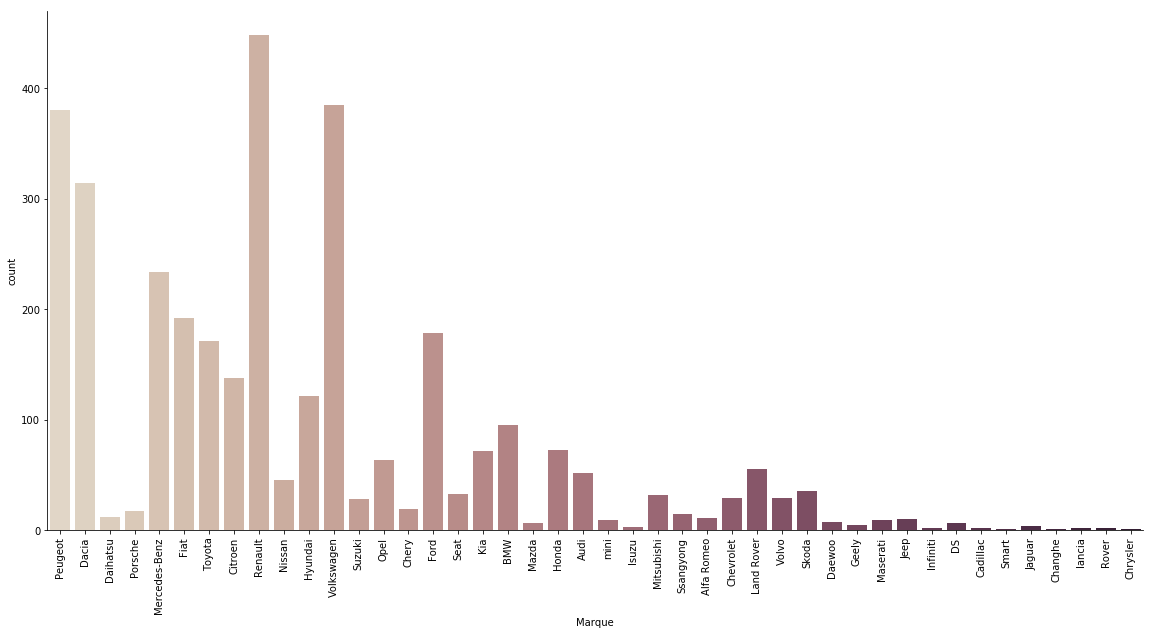

In [72]:
var = "Marque"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df);
plt.xticks(rotation=90);

<function matplotlib.pyplot.show(*args, **kw)>

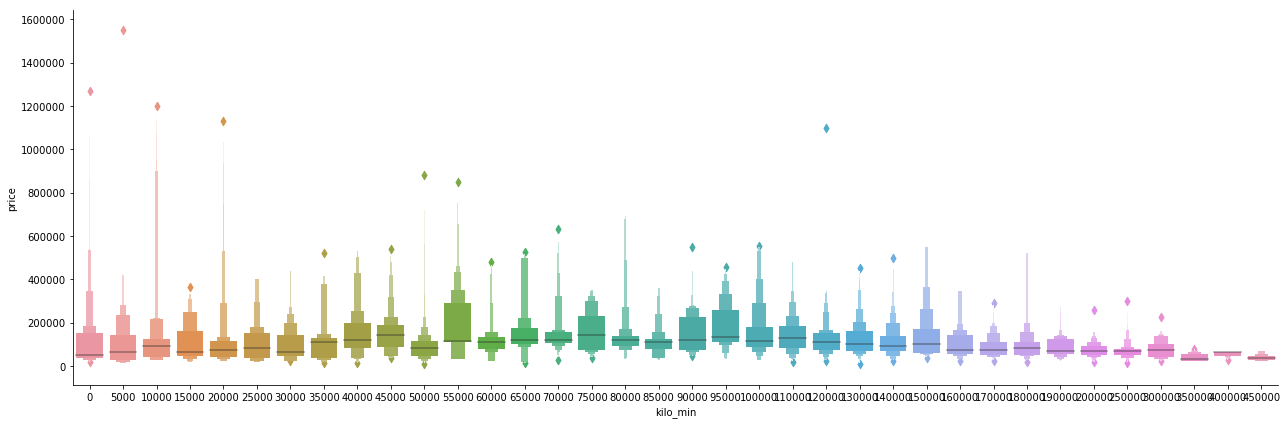

In [73]:
var='kilo_min'
sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

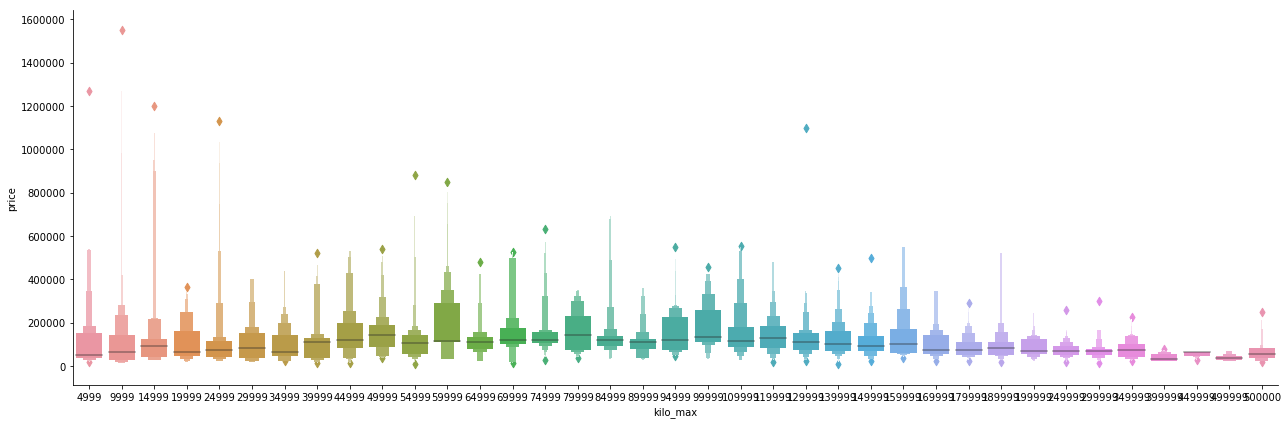

In [74]:
var='kilo_max'
sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

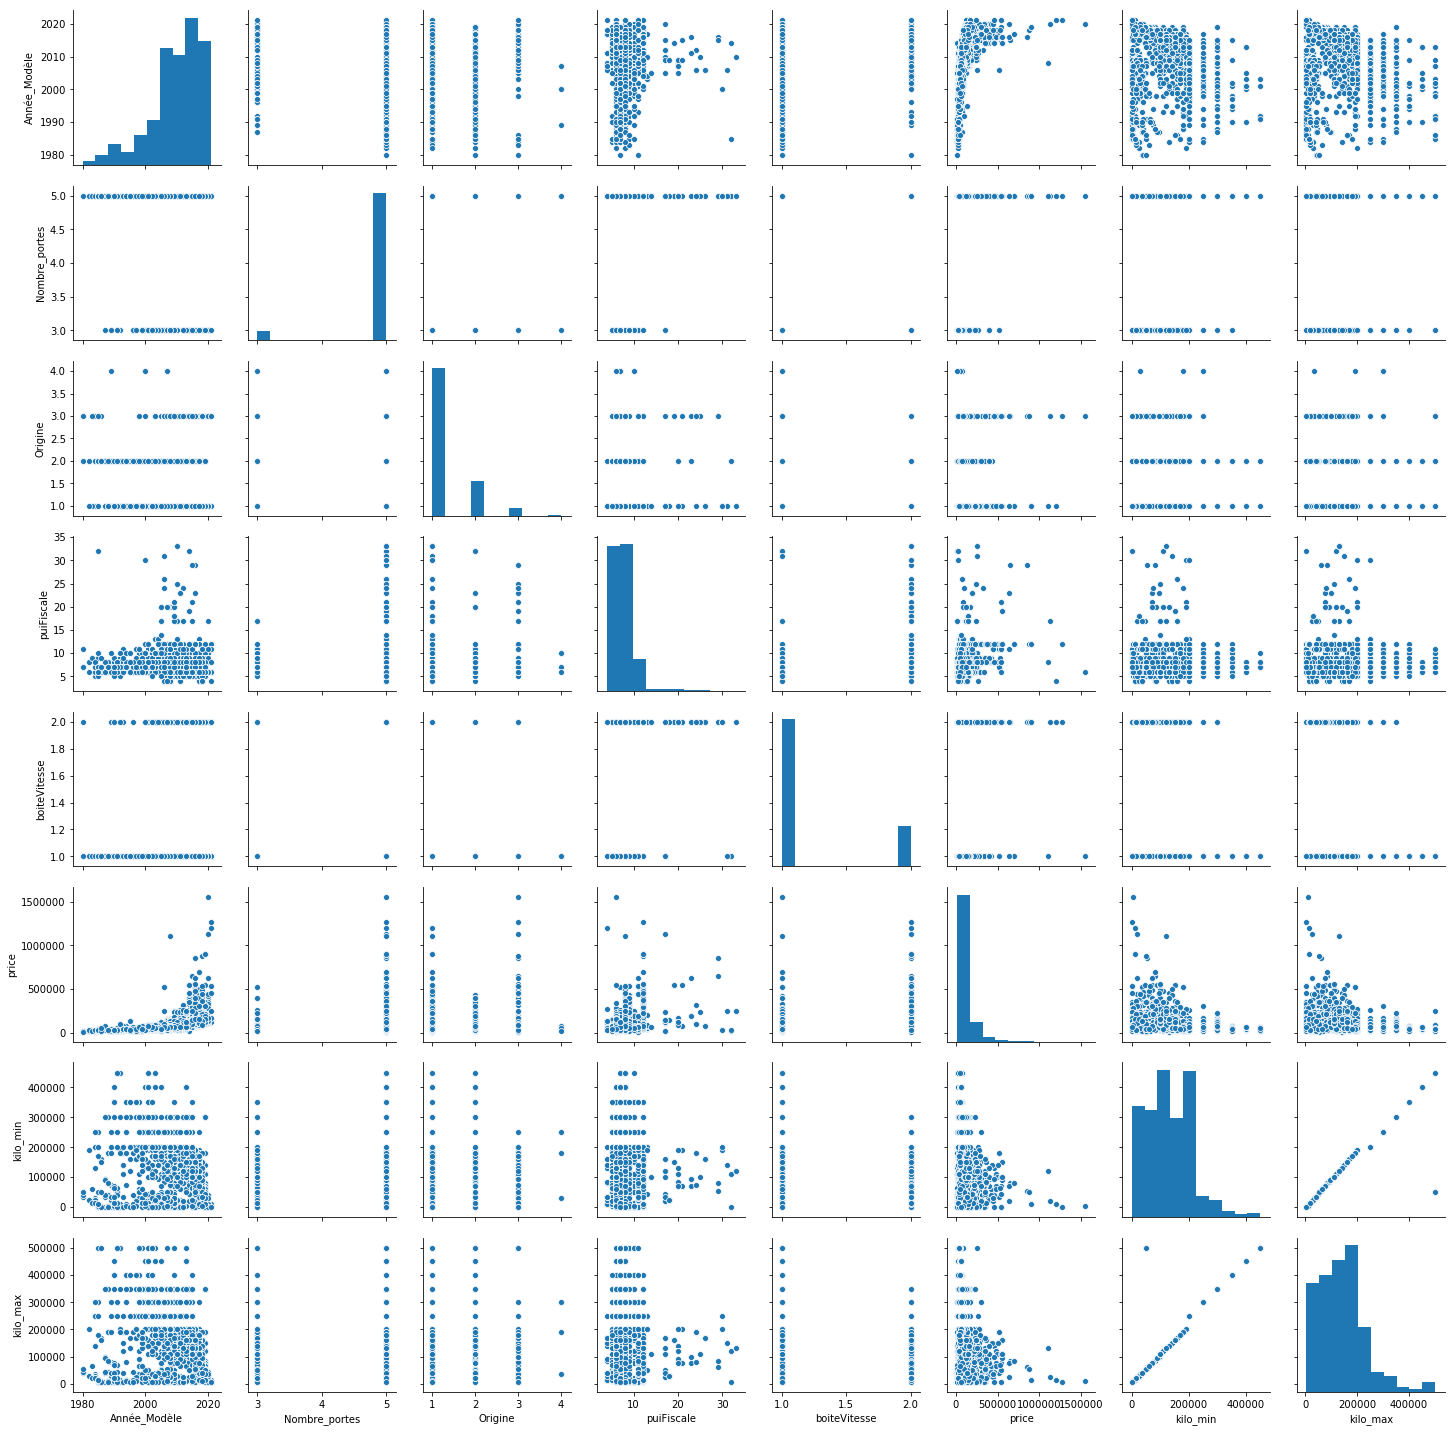

In [75]:
sns.pairplot(df)
plt.show()

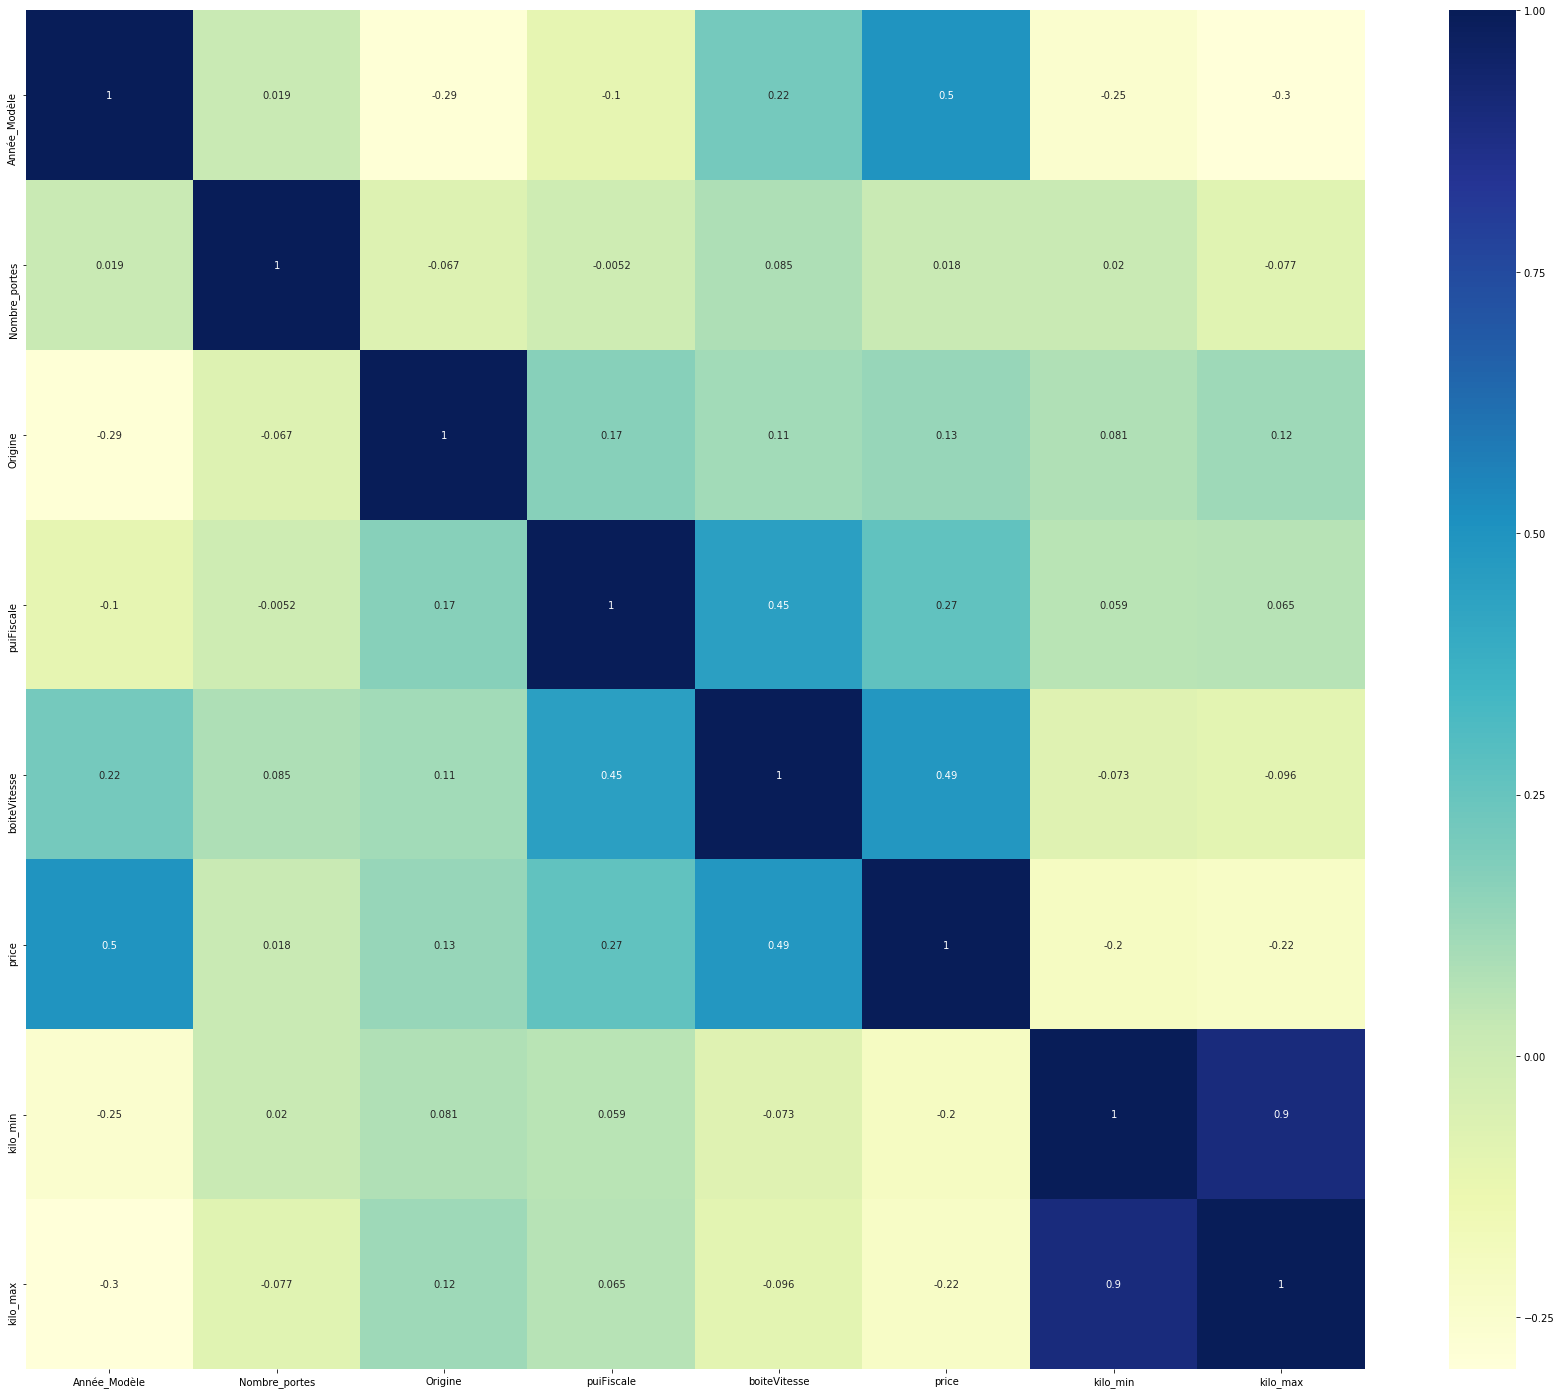

In [76]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

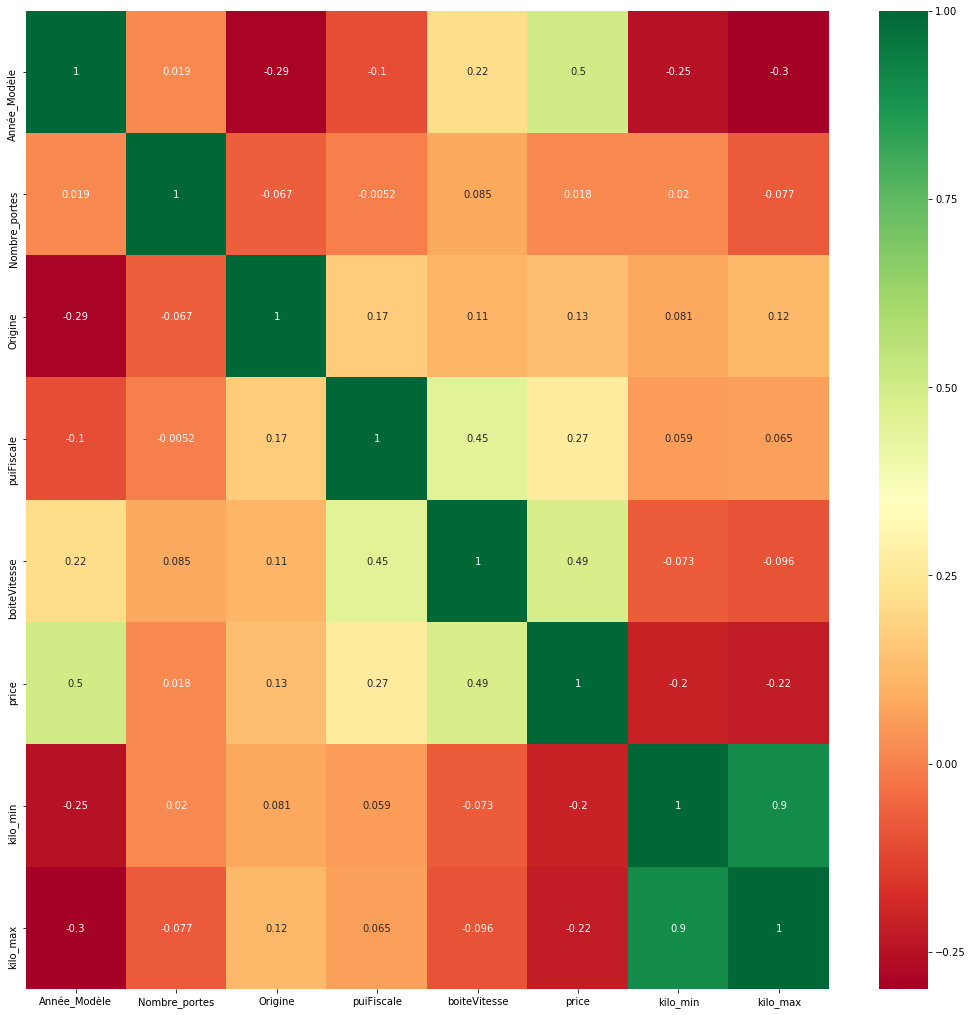

In [77]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [78]:
'''
dic={"boiteVitesse":{'Manuelle':1 , 'Automatique':2}}
dic={"Origine":{'WW au Maroc':1 , 'Dédouanée':2,'Importée neuve':3 ,'Pas encore dédouanée':4 }}
print(df.carburant.unique())
print(df.Marque.unique())
print(df.Année_Modèle.unique())
print(df.Nombre_portes.unique())
print(df.Origine.unique())
print(df.Modèle.unique())
print(df.price.unique())
print(df.puiFiscale.unique())
print(df.boiteVitesse.unique())
print(df.kilo_min.unique())
print(df.kilo_max.unique())

'''

'\ndic={"boiteVitesse":{\'Manuelle\':1 , \'Automatique\':2}}\ndic={"Origine":{\'WW au Maroc\':1 , \'Dédouanée\':2,\'Importée neuve\':3 ,\'Pas encore dédouanée\':4 }}\nprint(df.carburant.unique())\nprint(df.Marque.unique())\nprint(df.Année_Modèle.unique())\nprint(df.Nombre_portes.unique())\nprint(df.Origine.unique())\nprint(df.Modèle.unique())\nprint(df.price.unique())\nprint(df.puiFiscale.unique())\nprint(df.boiteVitesse.unique())\nprint(df.kilo_min.unique())\nprint(df.kilo_max.unique())\n\n'

In [79]:
dic={"boiteVitesse":{1:'Manuelle' , 2:'Automatique'}}
df.replace(dic,inplace=True)
df.head()

,Année_Modèle,Marque,Modèle,Nombre_portes,Origine,carburant,puiFiscale,boiteVitesse,price,kilo_min,kilo_max
0,2012,Peugeot,206+,5,1,Essence,6,Manuelle,60000.0,90000,94999
1,2011,Peugeot,Partner,5,1,Diesel,7,Manuelle,62000.0,25000,29999
2,2010,Dacia,Sandero,5,1,Diesel,6,Manuelle,65000.0,250000,299999
4,2008,Daihatsu,Sirion,5,1,Essence,6,Manuelle,48000.0,150000,159999
5,2014,Dacia,Duster,5,1,Diesel,6,Manuelle,98000.0,170000,179999


In [80]:
dic={"Origine":{1:'WW au Maroc' , 2:'Dédouanée', 3:'Importée neuve' , 4:'Pas encore dédouanée' }}
df.replace(dic,inplace=True)
df.head()

,Année_Modèle,Marque,Modèle,Nombre_portes,Origine,carburant,puiFiscale,boiteVitesse,price,kilo_min,kilo_max
0,2012,Peugeot,206+,5,WW au Maroc,Essence,6,Manuelle,60000.0,90000,94999
1,2011,Peugeot,Partner,5,WW au Maroc,Diesel,7,Manuelle,62000.0,25000,29999
2,2010,Dacia,Sandero,5,WW au Maroc,Diesel,6,Manuelle,65000.0,250000,299999
4,2008,Daihatsu,Sirion,5,WW au Maroc,Essence,6,Manuelle,48000.0,150000,159999
5,2014,Dacia,Duster,5,WW au Maroc,Diesel,6,Manuelle,98000.0,170000,179999


In [81]:
var = 'carburant'
carburant = df[[var]]
carburant = pd.get_dummies(carburant,drop_first=True)
carburant.head()

var = 'boiteVitesse'
boiteVitesse = df[[var]]
boiteVitesse = pd.get_dummies(boiteVitesse,drop_first=True)
boiteVitesse.head()

var = 'Origine'
Origine = df[[var]]
Origine = pd.get_dummies(Origine,drop_first=True)
Origine.head()

new_df=pd.concat([df,carburant,boiteVitesse,Origine],axis=1)
new_df.drop(["carburant","boiteVitesse","Origine"],axis=1,inplace=True)
new_df.head()

,Année_Modèle,Marque,Modèle,Nombre_portes,puiFiscale,price,kilo_min,kilo_max,carburant_Essence,carburant_Hybride,boiteVitesse_Manuelle,Origine_Importée neuve,Origine_Pas encore dédouanée,Origine_WW au Maroc
0,2012,Peugeot,206+,5,6,60000.0,90000,94999,1,0,1,0,0,1
1,2011,Peugeot,Partner,5,7,62000.0,25000,29999,0,0,1,0,0,1
2,2010,Dacia,Sandero,5,6,65000.0,250000,299999,0,0,1,0,0,1
4,2008,Daihatsu,Sirion,5,6,48000.0,150000,159999,1,0,1,0,0,1
5,2014,Dacia,Duster,5,6,98000.0,170000,179999,0,0,1,0,0,1


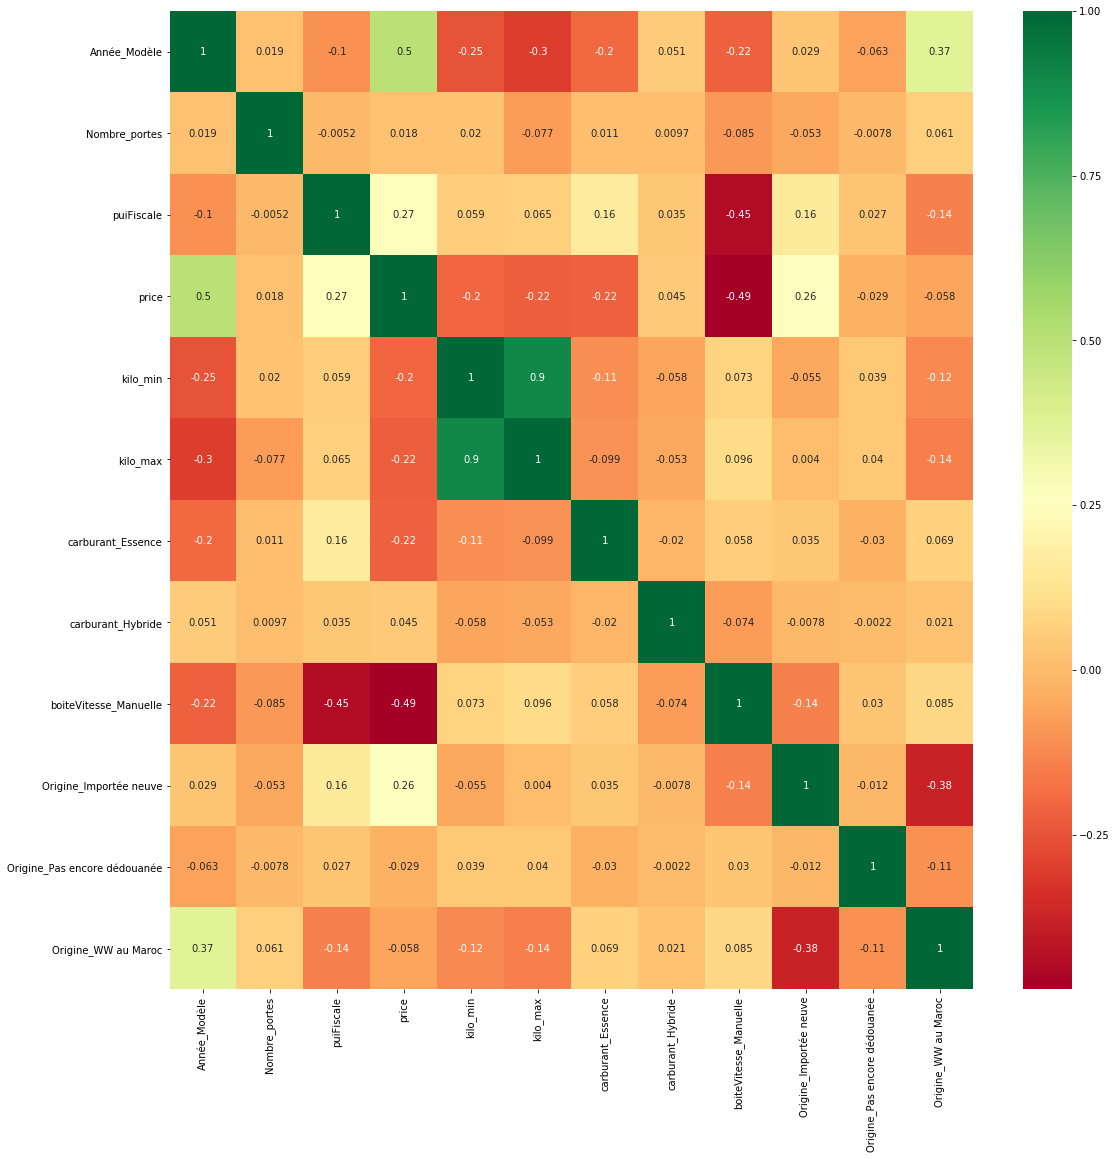

In [82]:
plt.figure(figsize=(18,18))
sns.heatmap(new_df.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [83]:
new_df.drop(["Marque"],axis=1,inplace=True)
new_df.drop(["Modèle"],axis=1,inplace=True)

In [84]:
new_df

,Année_Modèle,Nombre_portes,puiFiscale,price,kilo_min,kilo_max,carburant_Essence,carburant_Hybride,boiteVitesse_Manuelle,Origine_Importée neuve,Origine_Pas encore dédouanée,Origine_WW au Maroc
0,2012,5,6,60000.0,90000,94999,1,0,1,0,0,1
1,2011,5,7,62000.0,25000,29999,0,0,1,0,0,1
2,2010,5,6,65000.0,250000,299999,0,0,1,0,0,1
4,2008,5,6,48000.0,150000,159999,1,0,1,0,0,1
5,2014,5,6,98000.0,170000,179999,0,0,1,0,0,1
7,2015,5,12,450000.0,130000,139999,0,0,0,0,0,1
8,1991,5,8,40000.0,10000,14999,0,0,1,0,0,0
9,2012,5,6,67000.0,140000,149999,1,0,1,0,0,1
10,2018,5,5,140000.0,75000,79999,0,0,1,0,0,1
13,2017,5,6,117000.0,110000,119999,0,0,1,0,0,0


In [85]:
new_df.drop(["kilo_min"],axis=1,inplace=True)
new_df.drop(["kilo_max"],axis=1,inplace=True)

In [86]:
new_df.head(1)

,Année_Modèle,Nombre_portes,puiFiscale,price,carburant_Essence,carburant_Hybride,boiteVitesse_Manuelle,Origine_Importée neuve,Origine_Pas encore dédouanée,Origine_WW au Maroc
0,2012,5,6,60000.0,1,0,1,0,0,1


In [87]:
df=new_df

In [88]:
X = df
y = df.pop('price')

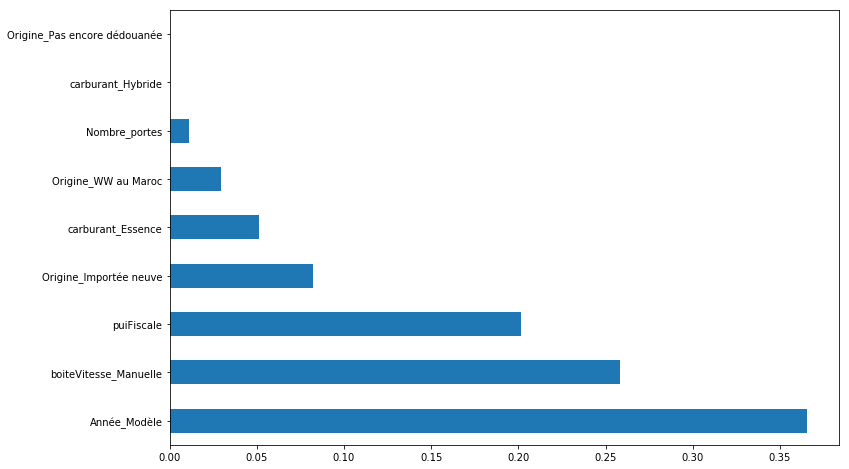

In [89]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [90]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)


In [91]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))


Accuracy on Traing set:  0.5000643980063301
Accuracy on Testing set:  0.4409385302615543


In [92]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))


Accuracy on Traing set:  0.8710026486475337
Accuracy on Testing set:  0.6837744974691105


In [93]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  18321.322996011335
Mean Squared  Error      :  3884450991.9894643
Root Mean Squared  Error :  62325.36395392701
R Squared Error          :  0.6837744974691105


In [94]:
#sklearn
#from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1)

In [100]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    
    ]

In [ ]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted, pos_label=2)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    #MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted,pos_label='positive',average='micro')
   # MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    
    
    
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Precission Comparison')
plt.show()

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA AUC Comparison')
plt.show()

In [ ]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

In [ ]:
'''
Linear Regression (Linear algo)
Ridge Regression (Linear algo)
LASSO Linear Regression (Linear algo)
Elastic Net Regression (Linear algo)
KNN (non-linear algo)
CART (non-linear algo)
SVM (Non-linear algo)
Bagged Decision Trees (Bagging)
Random Forest (Bagging)
Extra Trees (Bagging)
AdaBoost (Boosting)
Stochastic Gradient Boosting (Boosting)
MLP (Deep Learning)
XGBoost

'''

In [129]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
hyperparameters = {
    'n_estimators': [i for i in range(30, 35)], 
    'criterion': ['mse', 'mae'],
    'max_depth': [i for i in range(4, 12)],
    'max_features': ["auto", "sqrt", "log2"]
}
gs = GridSearchCV(model, hyperparameters)
f = gs.fit(x_train, y_train)

In [130]:
y_pred = f.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

mse, mae

(1598723021.6369736, 20645.15378469627)

In [131]:
gs.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 34}